In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 150
generations = int(1500/necoc)
generations

10

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

62


In [7]:
len(number_codes[0])

150

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.48429 stdev: 0.14613
Best fitness: 0.79221 - size: (2, 13) - species 2 - id 95
Average adjusted fitness: 0.234
Mean genetic distance 2.814, standard deviation 0.454
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 32.470 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56214 stdev: 0.15402
Best fitness: 0.80272 - size: (3, 15) - species 7 - id 224
Average adjusted fitness: 0.326
Mean genetic distance 2.936, standard deviation 0.493
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 37.234 sec (34.852 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60068 stdev: 0.14665
Best fitness: 0.82684 - size: (3, 15) - species 2 - id 521
Average adjusted fitness: 0.307
Mean genetic distance 2.958, standard deviation 0.507
Population of 201 members in 25 species
Total extinc

Population's average fitness: 0.59276 stdev: 0.08125
Best fitness: 0.76685 - size: (3, 15) - species 26 - id 818
Average adjusted fitness: 0.232
Mean genetic distance 3.155, standard deviation 0.479
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 31.916 sec (29.026 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58890 stdev: 0.08790
Best fitness: 0.78293 - size: (3, 16) - species 26 - id 947
Average adjusted fitness: 0.232
Mean genetic distance 3.146, standard deviation 0.492
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 31.596 sec (29.454 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60065 stdev: 0.08290
Best fitness: 0.78293 - size: (3, 16) - species 26 - id 947
Average adjusted fitness: 0.253
Mean genetic distance 3.180, standard deviation 0.490
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 32.448 sec (29.882 average)

 *****

Population's average fitness: 0.61935 stdev: 0.08398
Best fitness: 0.76314 - size: (4, 17) - species 17 - id 419
Average adjusted fitness: 0.256
Mean genetic distance 3.090, standard deviation 0.489
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 33.419 sec (31.023 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63373 stdev: 0.07622
Best fitness: 0.76314 - size: (4, 17) - species 17 - id 419
Average adjusted fitness: 0.230
Mean genetic distance 3.078, standard deviation 0.493
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 32.683 sec (31.189 average)
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.44731 stdev: 0.20685
Best fitness: 0.81076 - size: (2, 13) - species 6 - id 157
Average adjusted fitness: 0.242
Mean genetic distance 2.941, standard deviation 0.500
Population of 200 members in 21 species
Total extinctions: 0
Generation

Population's average fitness: 0.59140 stdev: 0.08362
Best fitness: 0.81818 - size: (3, 14) - species 22 - id 336
Average adjusted fitness: 0.263
Mean genetic distance 2.988, standard deviation 0.474
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 29.407 sec (29.544 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58607 stdev: 0.09768
Best fitness: 0.81818 - size: (3, 14) - species 22 - id 336
Average adjusted fitness: 0.232
Mean genetic distance 3.041, standard deviation 0.475
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 29.572 sec (29.551 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58872 stdev: 0.10166
Best fitness: 0.83117 - size: (4, 15) - species 22 - id 801
Average adjusted fitness: 0.262
Mean genetic distance 3.074, standard deviation 0.488
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 30.787 sec (29.799 average)

 *****

Population's average fitness: 0.60935 stdev: 0.09310
Best fitness: 0.80087 - size: (2, 14) - species 19 - id 488
Average adjusted fitness: 0.299
Mean genetic distance 3.092, standard deviation 0.528
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 23.905 sec (22.742 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60752 stdev: 0.10112
Best fitness: 0.80210 - size: (4, 16) - species 22 - id 1215
Average adjusted fitness: 0.360
Mean genetic distance 3.109, standard deviation 0.524
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 25.257 sec (23.057 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62458 stdev: 0.09905
Best fitness: 0.80210 - size: (4, 16) - species 22 - id 1215
Average adjusted fitness: 0.228
Mean genetic distance 3.130, standard deviation 0.546
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 26.695 sec (23.461 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.50258 stdev: 0.06203
Best fitness: 0.72727 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.254
Mean genetic distance 2.932, standard deviation 0.494
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 20.210 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53539 stdev: 0.06014
Best fitness: 0.72727 - size: (2, 13) - species 8 - id 4
Average adjusted fitness: 0.149
Mean genetic distance 3.019, standard deviation 0.503
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 21.383 sec (20.797 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54378 stdev: 0.06464
Best fitness: 0.72727 - size: (2, 13) - species 19 - id 4
Average adjusted fitness: 0.139
Mean genetic distance 3.012, standard deviation 0.488
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 22.390 sec (21.328 av

Population's average fitness: 0.56030 stdev: 0.07043
Best fitness: 0.78355 - size: (4, 17) - species 5 - id 679
Average adjusted fitness: 0.144
Mean genetic distance 3.077, standard deviation 0.499
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 23.774 sec (22.219 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57300 stdev: 0.07298
Best fitness: 0.78355 - size: (4, 17) - species 5 - id 679
Average adjusted fitness: 0.211
Mean genetic distance 3.093, standard deviation 0.495
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 24.082 sec (22.530 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57443 stdev: 0.06989
Best fitness: 0.78355 - size: (4, 17) - species 5 - id 679
Average adjusted fitness: 0.131
Mean genetic distance 3.074, standard deviation 0.498
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 24.246 sec (22.775 average)

 ****** R

Population's average fitness: 0.62810 stdev: 0.09527
Best fitness: 0.81076 - size: (5, 19) - species 31 - id 1169
Average adjusted fitness: 0.225
Mean genetic distance 3.196, standard deviation 0.504
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 24.227 sec (23.186 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62044 stdev: 0.10123
Best fitness: 0.83426 - size: (7, 21) - species 31 - id 1393
Average adjusted fitness: 0.348
Mean genetic distance 3.216, standard deviation 0.510
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 25.489 sec (23.416 average)
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.50071 stdev: 0.05009
Best fitness: 0.63080 - size: (2, 13) - species 1 - id 77
Average adjusted fitness: 0.145
Mean genetic distance 2.833, standard deviation 0.468
Population of 199 members in 18 species
Total extinctions: 0
Generation

Population's average fitness: 0.55027 stdev: 0.09602
Best fitness: 0.73531 - size: (3, 15) - species 6 - id 511
Average adjusted fitness: 0.216
Mean genetic distance 2.940, standard deviation 0.482
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 22.150 sec (21.049 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57049 stdev: 0.09061
Best fitness: 0.73531 - size: (3, 15) - species 6 - id 511
Average adjusted fitness: 0.288
Mean genetic distance 3.083, standard deviation 0.495
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 23.973 sec (21.780 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57930 stdev: 0.09261
Best fitness: 0.73531 - size: (3, 15) - species 6 - id 511
Average adjusted fitness: 0.237
Mean genetic distance 3.117, standard deviation 0.463
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 24.190 sec (22.262 average)

 ****** R

Population's average fitness: 0.61355 stdev: 0.09934
Best fitness: 0.81076 - size: (5, 19) - species 29 - id 814
Average adjusted fitness: 0.274
Mean genetic distance 3.085, standard deviation 0.513
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 24.627 sec (22.911 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62445 stdev: 0.09768
Best fitness: 0.81076 - size: (5, 19) - species 29 - id 814
Average adjusted fitness: 0.156
Mean genetic distance 3.117, standard deviation 0.505
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 24.414 sec (23.099 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62773 stdev: 0.09975
Best fitness: 0.81076 - size: (5, 19) - species 29 - id 814
Average adjusted fitness: 0.245
Mean genetic distance 3.127, standard deviation 0.500
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 25.779 sec (23.396 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.48419 stdev: 0.09537
Best fitness: 0.71861 - size: (2, 13) - species 5 - id 82
Average adjusted fitness: 0.246
Mean genetic distance 2.888, standard deviation 0.482
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 20.035 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53743 stdev: 0.10167
Best fitness: 0.74830 - size: (3, 15) - species 9 - id 219
Average adjusted fitness: 0.308
Mean genetic distance 2.942, standard deviation 0.480
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 21.132 sec (20.583 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55756 stdev: 0.11097
Best fitness: 0.77056 - size: (3, 14) - species 15 - id 491
Average adjusted fitness: 0.286
Mean genetic distance 3.014, standard deviation 0.461
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 22.716 sec (21.2

Population's average fitness: 0.84041 stdev: 0.16037
Best fitness: 0.96970 - size: (2, 11) - species 17 - id 672
Average adjusted fitness: 0.723
Mean genetic distance 3.047, standard deviation 0.504
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 22.520 sec (22.209 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.82136 stdev: 0.18458
Best fitness: 0.97774 - size: (6, 20) - species 5 - id 963
Average adjusted fitness: 0.717
Mean genetic distance 3.029, standard deviation 0.491
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 22.952 sec (22.332 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.82738 stdev: 0.18251
Best fitness: 0.97774 - size: (6, 20) - species 5 - id 963
Average adjusted fitness: 0.711
Mean genetic distance 3.095, standard deviation 0.505
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 23.570 sec (22.509 average)

 ****** 

Population's average fitness: 0.58673 stdev: 0.07177
Best fitness: 0.72171 - size: (5, 20) - species 17 - id 1264
Average adjusted fitness: 0.180
Mean genetic distance 3.144, standard deviation 0.478
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 28.515 sec (23.653 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59033 stdev: 0.07022
Best fitness: 0.72171 - size: (5, 20) - species 17 - id 1264
Average adjusted fitness: 0.168
Mean genetic distance 3.131, standard deviation 0.478
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 25.954 sec (23.883 average)
number of class1:646
number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.52444 stdev: 0.09144
Best fitness: 0.70748 - size: (2, 13) - species 3 - id 164
Average adjusted fitness: 0.227
Mean genetic distance 2.882, standard deviation 0.483
Population of 199 members in 22 species
Total extinctions: 0
Generatio

Population's average fitness: 0.65365 stdev: 0.19032
Best fitness: 0.85158 - size: (3, 15) - species 3 - id 405
Average adjusted fitness: 0.407
Mean genetic distance 3.045, standard deviation 0.463
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 22.530 sec (21.413 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.68046 stdev: 0.19045
Best fitness: 0.85158 - size: (3, 15) - species 3 - id 405
Average adjusted fitness: 0.431
Mean genetic distance 3.074, standard deviation 0.492
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 23.405 sec (21.911 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.71255 stdev: 0.16491
Best fitness: 0.85158 - size: (3, 15) - species 3 - id 405
Average adjusted fitness: 0.469
Mean genetic distance 3.062, standard deviation 0.484
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 24.996 sec (22.528 average)

 ****** R

Population's average fitness: 0.62112 stdev: 0.10662
Best fitness: 0.82066 - size: (5, 18) - species 16 - id 1057
Average adjusted fitness: 0.323
Mean genetic distance 3.133, standard deviation 0.472
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 24.425 sec (22.716 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62509 stdev: 0.11224
Best fitness: 0.82066 - size: (5, 18) - species 16 - id 1057
Average adjusted fitness: 0.348
Mean genetic distance 3.156, standard deviation 0.470
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 24.279 sec (22.911 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63219 stdev: 0.11464
Best fitness: 0.82066 - size: (5, 18) - species 16 - id 1057
Average adjusted fitness: 0.297
Mean genetic distance 3.214, standard deviation 0.460
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 25.206 sec (23.166 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.43985 stdev: 0.26097
Best fitness: 0.90291 - size: (2, 13) - species 4 - id 15
Average adjusted fitness: 0.315
Mean genetic distance 2.934, standard deviation 0.452
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 20.075 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60186 stdev: 0.26711
Best fitness: 0.90353 - size: (3, 15) - species 13 - id 250
Average adjusted fitness: 0.530
Mean genetic distance 2.982, standard deviation 0.480
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 21.173 sec (20.624 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68968 stdev: 0.23612
Best fitness: 0.90353 - size: (3, 15) - species 13 - id 250
Average adjusted fitness: 0.581
Mean genetic distance 2.999, standard deviation 0.469
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 22.215 sec (21.

Population's average fitness: 0.66118 stdev: 0.13341
Best fitness: 0.86209 - size: (2, 14) - species 4 - id 483
Average adjusted fitness: 0.407
Mean genetic distance 3.056, standard deviation 0.483
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 24.059 sec (22.370 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65599 stdev: 0.14191
Best fitness: 0.86209 - size: (2, 14) - species 4 - id 483
Average adjusted fitness: 0.354
Mean genetic distance 3.059, standard deviation 0.489
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 25.185 sec (22.839 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66803 stdev: 0.13177
Best fitness: 0.86209 - size: (2, 14) - species 4 - id 483
Average adjusted fitness: 0.360
Mean genetic distance 3.070, standard deviation 0.497
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 24.706 sec (23.106 average)

 ****** R

Population's average fitness: 0.64790 stdev: 0.11760
Best fitness: 0.78293 - size: (5, 17) - species 4 - id 676
Average adjusted fitness: 0.352
Mean genetic distance 3.144, standard deviation 0.507
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 25.547 sec (23.685 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66032 stdev: 0.10940
Best fitness: 0.78293 - size: (5, 17) - species 4 - id 676
Average adjusted fitness: 0.365
Mean genetic distance 3.175, standard deviation 0.509
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 25.290 sec (23.845 average)
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.56353 stdev: 0.21348
Best fitness: 0.85096 - size: (2, 13) - species 6 - id 184
Average adjusted fitness: 0.382
Mean genetic distance 2.977, standard deviation 0.488
Population of 200 members in 30 species
Total extinctions: 0
Generation t

Population's average fitness: 0.54272 stdev: 0.07866
Best fitness: 0.65121 - size: (3, 15) - species 7 - id 227
Average adjusted fitness: 0.186
Mean genetic distance 3.045, standard deviation 0.466
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 22.538 sec (21.334 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55266 stdev: 0.07534
Best fitness: 0.65121 - size: (3, 15) - species 7 - id 227
Average adjusted fitness: 0.183
Mean genetic distance 3.100, standard deviation 0.484
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 23.494 sec (21.874 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55357 stdev: 0.07864
Best fitness: 0.65306 - size: (5, 19) - species 26 - id 814
Average adjusted fitness: 0.185
Mean genetic distance 3.059, standard deviation 0.471
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 24.044 sec (22.308 average)

 ****** 

Population's average fitness: 0.57180 stdev: 0.07530
Best fitness: 0.73655 - size: (5, 20) - species 30 - id 1089
Average adjusted fitness: 0.223
Mean genetic distance 3.169, standard deviation 0.478
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 24.819 sec (23.224 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57543 stdev: 0.07626
Best fitness: 0.73655 - size: (5, 20) - species 30 - id 1089
Average adjusted fitness: 0.229
Mean genetic distance 3.177, standard deviation 0.472
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 25.664 sec (23.529 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58314 stdev: 0.07530
Best fitness: 0.73779 - size: (6, 23) - species 36 - id 1338
Average adjusted fitness: 0.238
Mean genetic distance 3.187, standard deviation 0.468
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 26.424 sec (23.851 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47911 stdev: 0.07791
Best fitness: 0.64502 - size: (2, 13) - species 1 - id 56
Average adjusted fitness: 0.136
Mean genetic distance 2.805, standard deviation 0.429
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 20.096 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53707 stdev: 0.07087
Best fitness: 0.64502 - size: (2, 13) - species 6 - id 56
Average adjusted fitness: 0.163
Mean genetic distance 2.856, standard deviation 0.470
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 21.301 sec (20.699 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56078 stdev: 0.06847
Best fitness: 0.68089 - size: (2, 13) - species 20 - id 449
Average adjusted fitness: 0.216
Mean genetic distance 2.936, standard deviation 0.475
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 22.193 sec (21.19

Population's average fitness: 0.60916 stdev: 0.10246
Best fitness: 0.78293 - size: (3, 16) - species 4 - id 685
Average adjusted fitness: 0.325
Mean genetic distance 3.086, standard deviation 0.516
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 24.893 sec (22.536 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61344 stdev: 0.10423
Best fitness: 0.78293 - size: (3, 16) - species 4 - id 685
Average adjusted fitness: 0.331
Mean genetic distance 3.114, standard deviation 0.504
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 24.801 sec (22.914 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61990 stdev: 0.10882
Best fitness: 0.78293 - size: (3, 16) - species 4 - id 685
Average adjusted fitness: 0.337
Mean genetic distance 3.121, standard deviation 0.507
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 24.784 sec (23.181 average)

 ****** R

Population's average fitness: 0.61401 stdev: 0.09934
Best fitness: 0.78541 - size: (3, 19) - species 33 - id 1040
Average adjusted fitness: 0.307
Mean genetic distance 3.219, standard deviation 0.502
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 25.065 sec (23.523 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62304 stdev: 0.09717
Best fitness: 0.79468 - size: (3, 20) - species 33 - id 1490
Average adjusted fitness: 0.277
Mean genetic distance 3.217, standard deviation 0.489
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 27.195 sec (23.890 average)
number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.52577 stdev: 0.09598
Best fitness: 0.74273 - size: (2, 13) - species 1 - id 189
Average adjusted fitness: 0.277
Mean genetic distance 2.885, standard deviation 0.468
Population of 199 members in 23 species
Total extinctions: 0
Generatio

Population's average fitness: 0.54988 stdev: 0.07264
Best fitness: 0.73346 - size: (3, 14) - species 28 - id 485
Average adjusted fitness: 0.223
Mean genetic distance 3.101, standard deviation 0.492
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.280 sec (21.224 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56010 stdev: 0.07143
Best fitness: 0.73902 - size: (4, 16) - species 21 - id 614
Average adjusted fitness: 0.177
Mean genetic distance 3.089, standard deviation 0.492
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 23.525 sec (21.799 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56742 stdev: 0.07574
Best fitness: 0.73902 - size: (4, 16) - species 21 - id 614
Average adjusted fitness: 0.200
Mean genetic distance 3.078, standard deviation 0.487
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 25.117 sec (22.463 average)

 *****

Population's average fitness: 0.72253 stdev: 0.16118
Best fitness: 0.87446 - size: (5, 18) - species 15 - id 1137
Average adjusted fitness: 0.533
Mean genetic distance 3.135, standard deviation 0.491
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 25.183 sec (22.922 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.74648 stdev: 0.13536
Best fitness: 0.87446 - size: (5, 18) - species 15 - id 1137
Average adjusted fitness: 0.540
Mean genetic distance 3.128, standard deviation 0.486
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 24.756 sec (23.151 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.74418 stdev: 0.13166
Best fitness: 0.87446 - size: (5, 18) - species 15 - id 1137
Average adjusted fitness: 0.541
Mean genetic distance 3.146, standard deviation 0.481
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 25.662 sec (23.430 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.58743 stdev: 0.19561
Best fitness: 0.82313 - size: (2, 13) - species 3 - id 154
Average adjusted fitness: 0.426
Mean genetic distance 2.824, standard deviation 0.477
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 20.189 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.66952 stdev: 0.17068
Best fitness: 0.86085 - size: (3, 15) - species 3 - id 361
Average adjusted fitness: 0.476
Mean genetic distance 2.944, standard deviation 0.467
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 21.519 sec (20.854 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72255 stdev: 0.12863
Best fitness: 0.86518 - size: (4, 17) - species 18 - id 537
Average adjusted fitness: 0.510
Mean genetic distance 3.019, standard deviation 0.460
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 22.615 sec (21.

Population's average fitness: 0.57946 stdev: 0.08603
Best fitness: 0.74892 - size: (4, 16) - species 20 - id 824
Average adjusted fitness: 0.203
Mean genetic distance 3.060, standard deviation 0.504
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 23.822 sec (22.189 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58494 stdev: 0.08440
Best fitness: 0.76438 - size: (5, 19) - species 20 - id 981
Average adjusted fitness: 0.215
Mean genetic distance 3.095, standard deviation 0.512
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 24.854 sec (22.633 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58446 stdev: 0.08800
Best fitness: 0.76438 - size: (5, 19) - species 20 - id 981
Average adjusted fitness: 0.259
Mean genetic distance 3.121, standard deviation 0.506
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 25.403 sec (23.029 average)

 *****

Population's average fitness: 0.60170 stdev: 0.08187
Best fitness: 0.75881 - size: (4, 17) - species 16 - id 831
Average adjusted fitness: 0.213
Mean genetic distance 3.142, standard deviation 0.511
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 26.453 sec (23.962 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60519 stdev: 0.08945
Best fitness: 0.75881 - size: (4, 17) - species 16 - id 831
Average adjusted fitness: 0.275
Mean genetic distance 3.188, standard deviation 0.482
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 26.931 sec (24.259 average)
number of class1:1457
number of class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.43921 stdev: 0.26865
Best fitness: 0.91095 - size: (2, 13) - species 2 - id 36
Average adjusted fitness: 0.290
Mean genetic distance 2.891, standard deviation 0.495
Population of 199 members in 19 species
Total extinctions: 0
Generation 

Population's average fitness: 0.55741 stdev: 0.11636
Best fitness: 0.79530 - size: (2, 13) - species 6 - id 368
Average adjusted fitness: 0.358
Mean genetic distance 2.999, standard deviation 0.524
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 22.174 sec (21.200 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57984 stdev: 0.11512
Best fitness: 0.82808 - size: (5, 17) - species 26 - id 672
Average adjusted fitness: 0.252
Mean genetic distance 3.052, standard deviation 0.499
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 23.036 sec (21.659 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60309 stdev: 0.10989
Best fitness: 0.82808 - size: (5, 17) - species 26 - id 672
Average adjusted fitness: 0.262
Mean genetic distance 3.054, standard deviation 0.487
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 24.488 sec (22.225 average)

 ******

Population's average fitness: 0.57406 stdev: 0.07696
Best fitness: 0.73160 - size: (2, 13) - species 2 - id 941
Average adjusted fitness: 0.257
Mean genetic distance 3.048, standard deviation 0.481
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 25.989 sec (23.765 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58719 stdev: 0.07896
Best fitness: 0.73160 - size: (2, 13) - species 2 - id 941
Average adjusted fitness: 0.270
Mean genetic distance 3.103, standard deviation 0.482
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 25.654 sec (24.001 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58454 stdev: 0.08049
Best fitness: 0.73160 - size: (2, 13) - species 1 - id 941
Average adjusted fitness: 0.285
Mean genetic distance 3.117, standard deviation 0.492
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 25.453 sec (24.163 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.48228 stdev: 0.09564
Best fitness: 0.70625 - size: (2, 13) - species 1 - id 52
Average adjusted fitness: 0.223
Mean genetic distance 2.848, standard deviation 0.484
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 20.339 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53900 stdev: 0.09679
Best fitness: 0.73346 - size: (3, 15) - species 7 - id 213
Average adjusted fitness: 0.233
Mean genetic distance 2.995, standard deviation 0.495
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 21.740 sec (21.040 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56682 stdev: 0.09354
Best fitness: 0.75696 - size: (3, 16) - species 2 - id 482
Average adjusted fitness: 0.218
Mean genetic distance 3.046, standard deviation 0.468
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 22.989 sec (21.68

Population's average fitness: 0.56306 stdev: 0.07145
Best fitness: 0.72233 - size: (2, 14) - species 2 - id 275
Average adjusted fitness: 0.233
Mean genetic distance 3.057, standard deviation 0.471
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 24.180 sec (22.907 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56567 stdev: 0.07266
Best fitness: 0.72233 - size: (2, 14) - species 30 - id 275
Average adjusted fitness: 0.189
Mean genetic distance 3.109, standard deviation 0.484
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 24.189 sec (23.121 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56624 stdev: 0.07027
Best fitness: 0.72233 - size: (2, 14) - species 30 - id 275
Average adjusted fitness: 0.172
Mean genetic distance 3.056, standard deviation 0.493
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 24.674 sec (23.343 average)

 ******

Population's average fitness: 0.62176 stdev: 0.12362
Best fitness: 0.83179 - size: (5, 18) - species 28 - id 944
Average adjusted fitness: 0.242
Mean genetic distance 3.160, standard deviation 0.474
Population of 210 members in 43 species
Total extinctions: 0
Generation time: 26.917 sec (24.293 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63485 stdev: 0.12144
Best fitness: 0.83179 - size: (5, 18) - species 28 - id 944
Average adjusted fitness: 0.276
Mean genetic distance 3.161, standard deviation 0.465
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 27.981 sec (24.661 average)
number of class1:1294
number of class2:323

 ****** Running generation 0 ****** 

Population's average fitness: 0.47890 stdev: 0.21972
Best fitness: 0.82127 - size: (2, 13) - species 3 - id 57
Average adjusted fitness: 0.289
Mean genetic distance 2.922, standard deviation 0.485
Population of 200 members in 24 species
Total extinctions: 0
Generation 

Population's average fitness: 0.55861 stdev: 0.09890
Best fitness: 0.75696 - size: (3, 14) - species 19 - id 307
Average adjusted fitness: 0.304
Mean genetic distance 3.020, standard deviation 0.499
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 23.130 sec (21.963 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57555 stdev: 0.09646
Best fitness: 0.75696 - size: (3, 14) - species 19 - id 307
Average adjusted fitness: 0.257
Mean genetic distance 3.041, standard deviation 0.473
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 23.786 sec (22.419 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58706 stdev: 0.10368
Best fitness: 0.76747 - size: (4, 17) - species 10 - id 805
Average adjusted fitness: 0.236
Mean genetic distance 3.073, standard deviation 0.480
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 23.919 sec (22.719 average)

 *****

Population's average fitness: 0.62453 stdev: 0.13487
Best fitness: 0.76747 - size: (4, 17) - species 31 - id 784
Average adjusted fitness: 0.358
Mean genetic distance 3.061, standard deviation 0.491
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 26.355 sec (23.028 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63596 stdev: 0.12861
Best fitness: 0.78479 - size: (3, 17) - species 20 - id 1234
Average adjusted fitness: 0.348
Mean genetic distance 3.045, standard deviation 0.492
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 24.338 sec (23.192 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65292 stdev: 0.11974
Best fitness: 0.79963 - size: (6, 21) - species 12 - id 1374
Average adjusted fitness: 0.370
Mean genetic distance 3.068, standard deviation 0.481
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 23.120 sec (23.184 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.44679 stdev: 0.15140
Best fitness: 0.79468 - size: (2, 13) - species 4 - id 170
Average adjusted fitness: 0.208
Mean genetic distance 2.894, standard deviation 0.471
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.769 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53638 stdev: 0.15495
Best fitness: 0.79468 - size: (2, 13) - species 4 - id 170
Average adjusted fitness: 0.314
Mean genetic distance 2.968, standard deviation 0.472
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 18.491 sec (18.630 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57817 stdev: 0.14802
Best fitness: 0.79468 - size: (2, 13) - species 20 - id 170
Average adjusted fitness: 0.333
Mean genetic distance 2.968, standard deviation 0.465
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 18.784 sec (18.

Population's average fitness: 0.58019 stdev: 0.07429
Best fitness: 0.73098 - size: (3, 15) - species 4 - id 256
Average adjusted fitness: 0.246
Mean genetic distance 3.099, standard deviation 0.486
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 18.238 sec (17.284 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58408 stdev: 0.07558
Best fitness: 0.76871 - size: (4, 18) - species 15 - id 961
Average adjusted fitness: 0.196
Mean genetic distance 3.076, standard deviation 0.480
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 18.260 sec (17.446 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59303 stdev: 0.07807
Best fitness: 0.76871 - size: (4, 18) - species 5 - id 961
Average adjusted fitness: 0.186
Mean genetic distance 3.071, standard deviation 0.488
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 19.026 sec (17.672 average)

 ****** 

Population's average fitness: 0.58966 stdev: 0.09428
Best fitness: 0.79901 - size: (4, 15) - species 35 - id 778
Average adjusted fitness: 0.259
Mean genetic distance 3.153, standard deviation 0.466
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 15.730 sec (15.256 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59548 stdev: 0.09723
Best fitness: 0.79901 - size: (4, 15) - species 35 - id 778
Average adjusted fitness: 0.236
Mean genetic distance 3.151, standard deviation 0.458
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 15.948 sec (15.325 average)
number of class1:319
number of class2:1298

 ****** Running generation 0 ****** 

Population's average fitness: 0.58328 stdev: 0.19823
Best fitness: 0.81880 - size: (2, 13) - species 3 - id 186
Average adjusted fitness: 0.366
Mean genetic distance 2.878, standard deviation 0.472
Population of 200 members in 22 species
Total extinctions: 0
Generation

Population's average fitness: 0.56777 stdev: 0.08641
Best fitness: 0.74026 - size: (3, 16) - species 23 - id 461
Average adjusted fitness: 0.231
Mean genetic distance 3.018, standard deviation 0.482
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 9.535 sec (9.385 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57255 stdev: 0.09016
Best fitness: 0.74026 - size: (3, 16) - species 23 - id 461
Average adjusted fitness: 0.251
Mean genetic distance 3.053, standard deviation 0.474
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 10.343 sec (9.624 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59617 stdev: 0.07548
Best fitness: 0.74026 - size: (3, 16) - species 11 - id 461
Average adjusted fitness: 0.232
Mean genetic distance 3.075, standard deviation 0.479
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 10.780 sec (9.855 average)

 ****** Ru

Population's average fitness: 0.63439 stdev: 0.12724
Best fitness: 0.78108 - size: (3, 14) - species 33 - id 670
Average adjusted fitness: 0.411
Mean genetic distance 3.147, standard deviation 0.486
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 10.583 sec (10.090 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62627 stdev: 0.13514
Best fitness: 0.78108 - size: (3, 14) - species 33 - id 670
Average adjusted fitness: 0.384
Mean genetic distance 3.133, standard deviation 0.476
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 10.927 sec (10.195 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65046 stdev: 0.10739
Best fitness: 0.78108 - size: (3, 14) - species 33 - id 670
Average adjusted fitness: 0.339
Mean genetic distance 3.144, standard deviation 0.467
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 11.220 sec (10.308 average)

 *****

Population's average fitness: 0.49972 stdev: 0.06205
Best fitness: 0.68707 - size: (2, 13) - species 4 - id 43
Average adjusted fitness: 0.220
Mean genetic distance 2.914, standard deviation 0.466
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.164 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53549 stdev: 0.06659
Best fitness: 0.71614 - size: (3, 15) - species 4 - id 261
Average adjusted fitness: 0.189
Mean genetic distance 3.016, standard deviation 0.508
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.725 sec (7.445 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55345 stdev: 0.06497
Best fitness: 0.71861 - size: (3, 14) - species 3 - id 490
Average adjusted fitness: 0.233
Mean genetic distance 2.994, standard deviation 0.520
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 8.097 sec (7.662 average)

 ****** Running generation 3 ***

Population's average fitness: 0.55836 stdev: 0.06959
Best fitness: 0.74088 - size: (5, 18) - species 5 - id 826
Average adjusted fitness: 0.233
Mean genetic distance 3.078, standard deviation 0.484
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.954 sec (8.176 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56464 stdev: 0.07564
Best fitness: 0.75634 - size: (4, 17) - species 8 - id 929
Average adjusted fitness: 0.274
Mean genetic distance 3.108, standard deviation 0.471
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 9.674 sec (8.425 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57994 stdev: 0.07115
Best fitness: 0.75634 - size: (4, 17) - species 8 - id 929
Average adjusted fitness: 0.218
Mean genetic distance 3.148, standard deviation 0.471
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 9.400 sec (8.565 average)

 ****** Running

Population's average fitness: 0.64564 stdev: 0.08943
Best fitness: 0.79963 - size: (7, 23) - species 6 - id 1164
Average adjusted fitness: 0.263
Mean genetic distance 3.152, standard deviation 0.469
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.669 sec (8.588 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64026 stdev: 0.10193
Best fitness: 0.79963 - size: (7, 23) - species 6 - id 1164
Average adjusted fitness: 0.277
Mean genetic distance 3.165, standard deviation 0.480
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.319 sec (8.662 average)
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.47868 stdev: 0.10807
Best fitness: 0.74521 - size: (2, 13) - species 8 - id 128
Average adjusted fitness: 0.267
Mean genetic distance 2.861, standard deviation 0.463
Population of 201 members in 18 species
Total extinctions: 0
Generation time

Mean genetic distance 2.999, standard deviation 0.437
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.180 sec (7.719 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64858 stdev: 0.11949
Best fitness: 0.78046 - size: (4, 17) - species 13 - id 660
Average adjusted fitness: 0.410
Mean genetic distance 3.014, standard deviation 0.439
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.487 sec (7.911 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64787 stdev: 0.11912
Best fitness: 0.82251 - size: (4, 18) - species 30 - id 802
Average adjusted fitness: 0.405
Mean genetic distance 3.016, standard deviation 0.429
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 8.442 sec (8.017 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65109 stdev: 0.12749
Best fitness: 0.82251 - size: (4, 18) - species 30 - id 802
Averag

Mean genetic distance 3.217, standard deviation 0.507
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 9.278 sec (8.617 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56503 stdev: 0.06567
Best fitness: 0.73902 - size: (4, 20) - species 37 - id 876
Average adjusted fitness: 0.200
Mean genetic distance 3.218, standard deviation 0.514
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 9.325 sec (8.705 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56251 stdev: 0.06474
Best fitness: 0.73902 - size: (4, 20) - species 37 - id 876
Average adjusted fitness: 0.162
Mean genetic distance 3.205, standard deviation 0.516
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 9.030 sec (8.741 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.56856 stdev: 0.06920
Best fitness: 0.73902 - size: (4, 20) - species 37 - id 876
Averag

Population's average fitness: 0.53509 stdev: 0.08430
Best fitness: 0.69079 - size: (2, 13) - species 6 - id 365
Average adjusted fitness: 0.161
Mean genetic distance 2.990, standard deviation 0.475
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.738 sec (7.474 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55985 stdev: 0.08383
Best fitness: 0.70748 - size: (4, 16) - species 15 - id 413
Average adjusted fitness: 0.216
Mean genetic distance 3.050, standard deviation 0.491
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.106 sec (7.685 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56951 stdev: 0.08321
Best fitness: 0.70748 - size: (4, 16) - species 15 - id 413
Average adjusted fitness: 0.247
Mean genetic distance 3.076, standard deviation 0.504
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.440 sec (7.874 average)

 ****** Runni

Population's average fitness: 0.70392 stdev: 0.16725
Best fitness: 0.84972 - size: (5, 19) - species 13 - id 984
Average adjusted fitness: 0.487
Mean genetic distance 3.062, standard deviation 0.467
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 9.353 sec (8.299 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70182 stdev: 0.18298
Best fitness: 0.84972 - size: (5, 19) - species 7 - id 984
Average adjusted fitness: 0.510
Mean genetic distance 3.085, standard deviation 0.467
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 9.424 sec (8.460 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.73232 stdev: 0.16018
Best fitness: 0.86085 - size: (4, 18) - species 20 - id 1280
Average adjusted fitness: 0.554
Mean genetic distance 3.126, standard deviation 0.481
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.450 sec (8.583 average)

 ****** Runn

Population's average fitness: 0.61046 stdev: 0.08747
Best fitness: 0.73717 - size: (6, 18) - species 34 - id 1346
Average adjusted fitness: 0.224
Mean genetic distance 3.175, standard deviation 0.468
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 9.798 sec (9.026 average)
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.53820 stdev: 0.15232
Best fitness: 0.78541 - size: (2, 13) - species 5 - id 75
Average adjusted fitness: 0.308
Mean genetic distance 2.975, standard deviation 0.483
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.518 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61473 stdev: 0.14669
Best fitness: 0.85529 - size: (2, 14) - species 5 - id 380
Average adjusted fitness: 0.422
Mean genetic distance 3.088, standard deviation 0.472
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.799 sec (7.6

Population's average fitness: 0.58273 stdev: 0.09343
Best fitness: 0.77180 - size: (3, 15) - species 4 - id 533
Average adjusted fitness: 0.267
Mean genetic distance 3.001, standard deviation 0.504
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.496 sec (8.001 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59292 stdev: 0.09360
Best fitness: 0.77180 - size: (3, 15) - species 4 - id 533
Average adjusted fitness: 0.327
Mean genetic distance 3.065, standard deviation 0.496
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.549 sec (8.111 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59451 stdev: 0.09844
Best fitness: 0.77180 - size: (3, 15) - species 4 - id 533
Average adjusted fitness: 0.270
Mean genetic distance 3.089, standard deviation 0.500
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.141 sec (8.282 average)

 ****** Running

Population's average fitness: 0.56923 stdev: 0.06597
Best fitness: 0.73655 - size: (5, 19) - species 23 - id 1217
Average adjusted fitness: 0.151
Mean genetic distance 3.170, standard deviation 0.487
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 8.949 sec (8.414 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56806 stdev: 0.06213
Best fitness: 0.73655 - size: (5, 19) - species 23 - id 1217
Average adjusted fitness: 0.176
Mean genetic distance 3.184, standard deviation 0.486
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.052 sec (8.485 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57130 stdev: 0.06087
Best fitness: 0.73655 - size: (5, 19) - species 35 - id 1217
Average adjusted fitness: 0.157
Mean genetic distance 3.181, standard deviation 0.482
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 9.374 sec (8.574 average)
number of 

Population's average fitness: 0.54698 stdev: 0.12812
Best fitness: 0.73593 - size: (2, 13) - species 5 - id 37
Average adjusted fitness: 0.262
Mean genetic distance 2.982, standard deviation 0.481
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.968 sec (7.663 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59459 stdev: 0.12365
Best fitness: 0.76252 - size: (2, 12) - species 5 - id 549
Average adjusted fitness: 0.302
Mean genetic distance 3.064, standard deviation 0.510
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 8.042 sec (7.790 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62890 stdev: 0.11089
Best fitness: 0.79159 - size: (4, 17) - species 4 - id 671
Average adjusted fitness: 0.357
Mean genetic distance 3.074, standard deviation 0.507
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.435 sec (7.951 average)

 ****** Running 

Population's average fitness: 0.58479 stdev: 0.08319
Best fitness: 0.77365 - size: (3, 14) - species 23 - id 976
Average adjusted fitness: 0.317
Mean genetic distance 3.010, standard deviation 0.496
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 9.282 sec (8.468 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58657 stdev: 0.08064
Best fitness: 0.77365 - size: (3, 14) - species 23 - id 976
Average adjusted fitness: 0.218
Mean genetic distance 3.052, standard deviation 0.486
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 10.607 sec (8.773 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57966 stdev: 0.08720
Best fitness: 0.78479 - size: (3, 16) - species 23 - id 1256
Average adjusted fitness: 0.245
Mean genetic distance 3.102, standard deviation 0.469
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 9.924 sec (8.917 average)

 ****** Ru

Population's average fitness: 0.81543 stdev: 0.16619
Best fitness: 0.90847 - size: (4, 18) - species 21 - id 1508
Average adjusted fitness: 0.705
Mean genetic distance 3.065, standard deviation 0.493
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.697 sec (8.658 average)
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.50614 stdev: 0.06653
Best fitness: 0.72665 - size: (2, 13) - species 2 - id 130
Average adjusted fitness: 0.211
Mean genetic distance 2.927, standard deviation 0.490
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.330 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53510 stdev: 0.08111
Best fitness: 0.75077 - size: (2, 14) - species 2 - id 358
Average adjusted fitness: 0.247
Mean genetic distance 3.020, standard deviation 0.495
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.886 sec (7.6

Population's average fitness: 0.58834 stdev: 0.07511
Best fitness: 0.75448 - size: (2, 13) - species 17 - id 99
Average adjusted fitness: 0.211
Mean genetic distance 3.068, standard deviation 0.496
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 8.428 sec (7.965 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59481 stdev: 0.07852
Best fitness: 0.75448 - size: (2, 13) - species 17 - id 99
Average adjusted fitness: 0.283
Mean genetic distance 3.063, standard deviation 0.482
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.680 sec (8.108 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60191 stdev: 0.08019
Best fitness: 0.75448 - size: (2, 13) - species 17 - id 99
Average adjusted fitness: 0.302
Mean genetic distance 3.111, standard deviation 0.495
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 9.102 sec (8.274 average)

 ****** Running

Population's average fitness: 0.58629 stdev: 0.08566
Best fitness: 0.75881 - size: (3, 16) - species 8 - id 1246
Average adjusted fitness: 0.189
Mean genetic distance 3.064, standard deviation 0.498
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 9.158 sec (8.632 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59376 stdev: 0.08950
Best fitness: 0.75881 - size: (3, 16) - species 8 - id 1246
Average adjusted fitness: 0.226
Mean genetic distance 3.102, standard deviation 0.494
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.304 sec (8.706 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59413 stdev: 0.08735
Best fitness: 0.75881 - size: (3, 16) - species 8 - id 1246
Average adjusted fitness: 0.254
Mean genetic distance 3.103, standard deviation 0.498
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.821 sec (8.818 average)
number of cla

Population's average fitness: 0.53363 stdev: 0.06068
Best fitness: 0.73098 - size: (3, 15) - species 17 - id 357
Average adjusted fitness: 0.176
Mean genetic distance 2.927, standard deviation 0.486
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 7.694 sec (7.409 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54141 stdev: 0.06378
Best fitness: 0.73098 - size: (3, 15) - species 17 - id 357
Average adjusted fitness: 0.182
Mean genetic distance 2.982, standard deviation 0.520
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.189 sec (7.669 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55243 stdev: 0.06632
Best fitness: 0.74335 - size: (3, 16) - species 24 - id 605
Average adjusted fitness: 0.152
Mean genetic distance 3.053, standard deviation 0.549
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.341 sec (7.837 average)

 ****** Runn

Population's average fitness: 0.59846 stdev: 0.10690
Best fitness: 0.82066 - size: (2, 13) - species 28 - id 71
Average adjusted fitness: 0.286
Mean genetic distance 3.059, standard deviation 0.482
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.506 sec (8.139 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59901 stdev: 0.10958
Best fitness: 0.82066 - size: (2, 13) - species 28 - id 71
Average adjusted fitness: 0.270
Mean genetic distance 3.059, standard deviation 0.479
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.698 sec (8.219 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61699 stdev: 0.10434
Best fitness: 0.82066 - size: (2, 13) - species 28 - id 71
Average adjusted fitness: 0.267
Mean genetic distance 3.045, standard deviation 0.473
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.609 sec (8.268 average)

 ****** Running

Population's average fitness: 0.66172 stdev: 0.12924
Best fitness: 0.86766 - size: (6, 22) - species 8 - id 1497
Average adjusted fitness: 0.321
Mean genetic distance 3.106, standard deviation 0.498
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 9.331 sec (8.781 average)
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.48038 stdev: 0.15618
Best fitness: 0.81571 - size: (2, 13) - species 3 - id 79
Average adjusted fitness: 0.319
Mean genetic distance 2.876, standard deviation 0.469
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.198 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56774 stdev: 0.15524
Best fitness: 0.83859 - size: (2, 14) - species 3 - id 381
Average adjusted fitness: 0.353
Mean genetic distance 3.080, standard deviation 0.493
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.628 sec (7.41

Population's average fitness: 0.56218 stdev: 0.07279
Best fitness: 0.75387 - size: (4, 17) - species 4 - id 687
Average adjusted fitness: 0.210
Mean genetic distance 3.153, standard deviation 0.540
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 8.354 sec (7.843 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56786 stdev: 0.07501
Best fitness: 0.75387 - size: (4, 17) - species 4 - id 687
Average adjusted fitness: 0.218
Mean genetic distance 3.150, standard deviation 0.533
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.716 sec (8.018 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57791 stdev: 0.07642
Best fitness: 0.75387 - size: (4, 17) - species 4 - id 687
Average adjusted fitness: 0.236
Mean genetic distance 3.228, standard deviation 0.544
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 8.854 sec (8.157 average)

 ****** Running

Population's average fitness: 0.58468 stdev: 0.08589
Best fitness: 0.79097 - size: (5, 18) - species 4 - id 793
Average adjusted fitness: 0.168
Mean genetic distance 3.170, standard deviation 0.519
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.186 sec (6.565 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59340 stdev: 0.08540
Best fitness: 0.81756 - size: (6, 19) - species 4 - id 1372
Average adjusted fitness: 0.173
Mean genetic distance 3.137, standard deviation 0.522
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.503 sec (6.669 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59356 stdev: 0.09321
Best fitness: 0.81756 - size: (6, 19) - species 4 - id 1372
Average adjusted fitness: 0.221
Mean genetic distance 3.162, standard deviation 0.524
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.328 sec (6.735 average)
number of clas

Population's average fitness: 0.52447 stdev: 0.09586
Best fitness: 0.76685 - size: (3, 13) - species 7 - id 302
Average adjusted fitness: 0.239
Mean genetic distance 2.950, standard deviation 0.492
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.982 sec (5.784 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55651 stdev: 0.09715
Best fitness: 0.76994 - size: (3, 16) - species 9 - id 448
Average adjusted fitness: 0.255
Mean genetic distance 3.024, standard deviation 0.490
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.527 sec (6.032 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58154 stdev: 0.09201
Best fitness: 0.78169 - size: (4, 15) - species 7 - id 691
Average adjusted fitness: 0.234
Mean genetic distance 3.097, standard deviation 0.515
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.438 sec (6.133 average)

 ****** Running

Total extinctions: 0
Generation time: 6.705 sec (6.285 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64325 stdev: 0.12717
Best fitness: 0.80210 - size: (2, 13) - species 6 - id 194
Average adjusted fitness: 0.347
Mean genetic distance 3.105, standard deviation 0.494
Population of 208 members in 32 species
Total extinctions: 0
Generation time: 6.968 sec (6.383 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65339 stdev: 0.12338
Best fitness: 0.80210 - size: (2, 13) - species 6 - id 194
Average adjusted fitness: 0.359
Mean genetic distance 3.099, standard deviation 0.495
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 7.110 sec (6.474 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65721 stdev: 0.12424
Best fitness: 0.80210 - size: (2, 13) - species 6 - id 194
Average adjusted fitness: 0.383
Mean genetic distance 3.100, standard deviation 0.490
Population of 201


 ****** Running generation 0 ****** 

Population's average fitness: 0.52063 stdev: 0.09470
Best fitness: 0.75819 - size: (2, 13) - species 5 - id 190
Average adjusted fitness: 0.228
Mean genetic distance 2.949, standard deviation 0.510
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.992 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56553 stdev: 0.09087
Best fitness: 0.75819 - size: (2, 13) - species 5 - id 190
Average adjusted fitness: 0.253
Mean genetic distance 3.037, standard deviation 0.487
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 5.923 sec (5.958 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57585 stdev: 0.09582
Best fitness: 0.75819 - size: (2, 13) - species 27 - id 190
Average adjusted fitness: 0.233
Mean genetic distance 3.083, standard deviation 0.490
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 6.323 sec (6.079 a

In [9]:
len(winner_list)

150

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8666666666666667

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  1  0]
 [ 0  0  1 11  0  0  0  0  1  1]
 [ 0  2  0  0 18  0  0  1  0  0]
 [ 0  0  0  3  0 18  0  0  1  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  3  2  0  0 18  1  2]
 [ 0  3  0  1  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


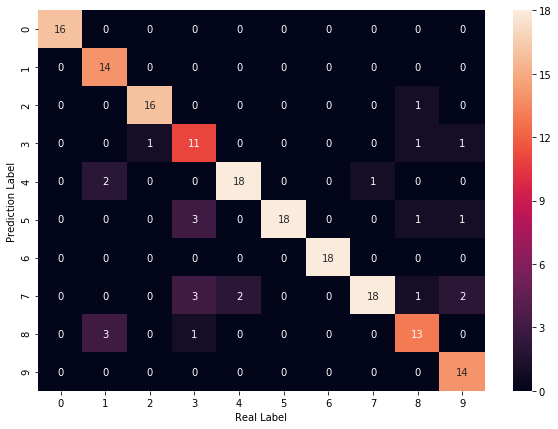

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:33 index:[5] real:5
#1 min_error:47 index:[3] real:2
#2 min_error:39 index:[8] real:8
#3 min_error:11 index:[0] real:0
#4 min_error:37 index:[1] real:1
#5 min_error:34 index:[7] real:7
#6 min_error:20 index:[6] real:6
#7 min_error:34 index:[3] real:3
#8 min_error:19 index:[2] real:2
#9 min_error:53 index:[1] real:1
#10 min_error:42 index:[7] real:7
#11 min_error:43 index:[7] real:4
#12 min_error:20 index:[6] real:6
#13 min_error:34 index:[3] real:3
#14 min_error:43 index:[1] real:1
#15 min_error:37 index:[3] real:3
#16 min_error:44 index:[7] real:9
#17 min_error:38 index:[1] real:1
#18 min_error:41 index:[7] real:7
#19 min_error:17 index:[6] real:6
#20 min_error:32 index:[8] real:8
#21 min_error:23 index:[4] real:4
#22 min_error:30 index:[3] real:3
#23 min_error:49 index:[1] real:1
#24 min_error:21 index:[4] real:4
#25 min_error:19 index:[0] real:0
#26 min_error:24 index:[5] real:5
#27 min_error:30 index:[3] real:3
#28 min_error:32 index:[6] real:6
#29 min_error:37 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8930117501546073
Avg Base Learner:0.796837765409194


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.09444444444444444
Accuracy on training set: 0.18888888888888888
Accuracy on training set: 0.26666666666666666
Accuracy on training set: 0.32222222222222224
Accuracy on training set: 0.3611111111111111
Accuracy on training set: 0.48333333333333334
Accuracy on training set: 0.45555555555555555
Accuracy on training set: 0.5
Accuracy on training set: 0.5388888888888889
Accuracy on training set: 0.5333333333333333
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.6611111111111111
Accuracy on trainin

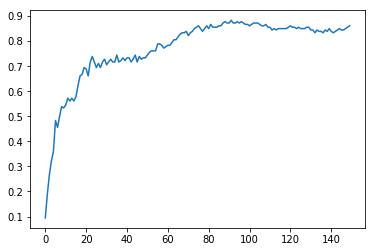

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.09444444444444444,
 0.18888888888888888,
 0.26666666666666666,
 0.32222222222222224,
 0.3611111111111111,
 0.48333333333333334,
 0.45555555555555555,
 0.5,
 0.5388888888888889,
 0.5333333333333333,
 0.5444444444444444,
 0.5722222222222222,
 0.5611111111111111,
 0.5722222222222222,
 0.5611111111111111,
 0.5777777777777777,
 0.6222222222222222,
 0.6611111111111111,
 0.6666666666666666,
 0.6944444444444444,
 0.6888888888888889,
 0.6611111111111111,
 0.7166666666666667,
 0.7388888888888889,
 0.7166666666666667,
 0.6944444444444444,
 0.7111111111111111,
 0.6944444444444444,
 0.7166666666666667,
 0.7277777777777777,
 0.7055555555555556,
 0.7166666666666667,
 0.7277777777777777,
 0.7166666666666667,
 0.7166666666666667,
 0.7444444444444445,
 0.7166666666666667,
 0.7222222222222222,
 0.7333333333333333,
 0.7222222222222222,
 0.7333333333333333,
 0.7333333333333333,
 0.7166666666666667,
 0.7277777777777777,
 0.7444444444444445,
 0.7166666666666667,
 0.7388888888888889,
 0.7277777777777777,
 